World Happiness Project

In [ ]:
# import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

# For regression analysis  use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#df1 = pd.read_csv("World_Happiness_Dataset.csv")
#df1.shape

In [ ]:
# reading the 6 reports into DataFrames
import pandas as pd
h15=pd.read_csv('2015.csv')
h16=pd.read_csv('2016.csv')
h17=pd.read_csv('2017.csv')
h18=pd.read_csv('2018.csv')
h19=pd.read_csv('2019.csv')
h20=pd.read_csv('2020.csv')

Run a `visual exploration of data in each dataframe,` mainly to understand what features are present in each dataset and they can be concatenated.

In [ ]:
h15.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [ ]:
h16.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [ ]:
h17.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [ ]:
h18.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [ ]:
h19.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
h20.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


`Key findings from the initial exploration:`

* We will need to add a column for the report year before concatenating the dataframes.
* Our target variable is "Happines Score" which is also called "Ladder Score", or "Score" in different years' data
* Other key variables are Country, and Region. The variable "Happines ranking" or "Ranking" which indicates the ranking of countries in each year can be extracted from Year and Score columns, but we'll keep this column for potentail use in the analysis.
* There are 6 features (independant variables): Economy, Family, Health, Freedon, Trust, Generosity. These features are named and organized differently in various years' data. Do, we will need to organize and rename before concatenating.
* Columns in addition to the above introduced columns vary across dataframes, most of which are being supplementary statistical measures. We will not use these columns in our analyses. 

**Selecting and Merging data**

In [ ]:
# adding Year column to the dataframes

h15.insert(0,'Year','')
h16.insert(0,'Year','')
h17.insert(0,'Year','')
h18.insert(0,'Year','')
h19.insert(0,'Year','')
h20.insert(0,'Year','')

h15['Year']=2015
h16['Year']=2016
h17['Year']=2017
h18['Year']=2018
h19['Year']=2019
h20['Year']=2020

In [ ]:
h15.head(2)

,Year,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [ ]:
# Selecting and renaming columns for 2015

h15=h15[['Year','Country','Region','Happiness Rank','Happiness Score',
         'Economy (GDP per Capita)','Family','Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']]
h15.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h15.head(2)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [ ]:
h16.head(2)

,Year,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2016,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [ ]:
# Selecting and renaming columns for 2016

h16=h16[['Year','Country','Region','Happiness Rank','Happiness Score',
         'Economy (GDP per Capita)','Family','Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity']]
h16.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h16.head(2)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2016,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,2016,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083


In [ ]:
h17.head(2)

,Year,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,2017,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2017,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [ ]:
# 2017 does not have Region column, we will add that. We will populate this column using other years data later
# Selecting and renaming columns for 2017

h17.insert(2,'Region','')
h17=h17[['Year','Country','Region','Happiness.Rank','Happiness.Score',
         'Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.',
         'Freedom','Trust..Government.Corruption.','Generosity']]
h17.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h17.head(2)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2017,Norway,,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,2017,Denmark,,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280


In [ ]:
h18.head(2)

,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [ ]:
# Listing the data in "Country or region" column
print(list(h18['Country or region']))

['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United States', 'Israel', 'United Arab Emirates', 'Czech Republic', 'Malta', 'France', 'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina', 'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore', 'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia', 'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan', 'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania', 'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica', 'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus', 'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova', 'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras', 'Belarus', 'Turkey', 'Pakistan', 'Hong Kong', 'Portugal', 'Serbia', 'Greece', 'Lebanon', 'Montenegro', 'Croatia', 'Dominic

`This shows that although the column is named "Country or region", it has country names in it. We will add a region column as we did for h17`

In [ ]:
# 2018 does not have Region column, we will add that. We will populate this column using other years data later
# Selecting and renaming columns for 2018

h18.insert(2,'Region','')
h18=h18[['Year','Country or region','Region','Overall rank','Score',
         'GDP per capita','Social support','Healthy life expectancy',
         'Freedom to make life choices','Perceptions of corruption','Generosity']]
h18.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h18.head(2)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2018,Finland,,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,2018,Norway,,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286


In [ ]:
h19.head(2)

,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
# 2019 data has the same structure as 2018

h19.insert(2,'Region','')
h19=h19[['Year','Country or region','Region','Overall rank','Score',
         'GDP per capita','Social support','Healthy life expectancy',
         'Freedom to make life choices','Perceptions of corruption','Generosity']]
h19.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h19.head(3)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2019,Finland,,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,2019,Denmark,,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2019,Norway,,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271


In [ ]:
h20.head(2)

,Year,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2020,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2020,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


In [ ]:
#h20 does not have Rank data and its columns are names and organized completely differently

h20.insert(3,'Rank','')
h20=h20[['Year','Country name','Regional indicator','Rank','Ladder score',
         'Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy',
         'Explained by: Freedom to make life choices','Explained by: Perceptions of corruption','Explained by: Generosity']]
h20.columns=['Year','Country','Region','Rank','Score','Economy','Family','Health','Freedom','Trust','Generosity']
h20.head(3)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2020,Finland,Western Europe,,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670
1,2020,Denmark,Western Europe,,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793
2,2020,Switzerland,Western Europe,,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056


In [ ]:
# adding Rank data to h20

import numpy as np

h20=h20.sort_values('Score',ascending=False)
h20['Rank']=np.arange(h20.shape[0])+1
h20.head(2)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2020,Finland,Western Europe,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670
1,2020,Denmark,Western Europe,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793


In [ ]:
happiness=pd.concat([h15,h16,h17,h18,h19,h20])
happiness.head(3)

,Year,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


`Checking and dropping Null values`

In [ ]:
# checking for null values
happiness.isnull().sum()

Year          0
Country       0
Region        0
Rank          0
Score         0
Economy       0
Family        0
Health        0
Freedom       0
Trust         1
Generosity    0
dtype: int64

In [ ]:
# dropping the rows with null values
happiness=happiness.dropna()
happiness.shape

(934, 11)

**Cleaning Country data**

In [ ]:
# checking for typos in country names
a=happiness.Country.unique()
a.sort()
print(a)
print('Number of uniques vaues:',len(a))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hong Kong'
 'Hong Kong S.A.R. of China' 'Hong Kong S.A.R., China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Libya' 'Lithuania' 'Luxembourg' 'Maced

'This shows that we have three version of **Hong Kong** and two versions of **Somaliland Region and Taiwan**. We will fix these.`

In [ ]:
# Fixing the consistency issue in country names
happiness.Country=happiness.Country.replace('Hong Kong S.A.R. of China','Hong Kong')
happiness.Country=happiness.Country.replace('Hong Kong S.A.R., China','Hong Kong')
happiness.Country=happiness.Country.replace('Somaliland region','Somaliland Region')
happiness.Country=happiness.Country.replace('Taiwan Province of China','Taiwan')

a=happiness.Country.unique()
a.sort()
print(a)
print('Number of uniques vaues:',len(a))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mal

**Cleaning and completing Region data**

In [ ]:
a=happiness.Region.unique()
a.sort()
print(a)
print('Number of uniques vaues:',len(a))

['' 'Australia and New Zealand' 'Central and Eastern Europe'
 'Commonwealth of Independent States' 'East Asia' 'Eastern Asia'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'Middle East and Northern Africa' 'North America' 'North America and ANZ'
 'South Asia' 'Southeast Asia' 'Southeastern Asia' 'Southern Asia'
 'Sub-Saharan Africa' 'Western Europe']
Number of uniques vaues: 17


As can be seen above, **there are two major issues with the Region data:**

We have **empty values in the Region column**. Data for the years 2017,2018, and 2019 did not have Region, so we'll need to populate data for those years
The existing values in the column have inconsistencies( i.e. there's Sout Asia and also Southern Asia, which should have the same value)
To address this issue, we'll use 2015 data as a dictionary and use lambda function to populate consistent region names for the countries across the dataset.

In [ ]:
# Building a dictionay from 2015 data to populate Region column for the years that did not have Region data
reg=pd.read_csv('2015.csv')
dict1=dict(zip(reg.Country,reg.Region))

# As the are a number of countries in 2016-2020 data that were not listed in 2015 data,
# we need to manually add them to the dictionary

dict1['Puerto Rico']='Latin America and Caribbean'
dict1['Belize']='Latin America and Caribbean'
dict1['Trinidad & Tobago']='Latin America and Caribbean'
dict1['Somalia']='Sub-Saharan Africa'
dict1['Somaliland Region']='Sub-Saharan Africa'
dict1['Namibia']='Sub-Saharan Africa'
dict1['South Sudan']='Sub-Saharan Africa'
dict1['Northern Cyprus']='Central and Eastern Europe'
dict1['North Macedonia']='Central and Eastern Europe'
dict1['Gambia']='Sub-Saharan Africa'
dict1['Maldives']='Southern Asia'

happiness['Region'] = happiness['Country'].apply(lambda x: dict1[x])

In [ ]:
a=happiness.Region.unique()
a.sort()
print(a)
print('Number of uniques vaues:',len(a))

['Australia and New Zealand' 'Central and Eastern Europe' 'Eastern Asia'
 'Latin America and Caribbean' 'Middle East and Northern Africa'
 'North America' 'Southeastern Asia' 'Southern Asia' 'Sub-Saharan Africa'
 'Western Europe']
Number of uniques vaues: 10



The code above shows that the Region column has no empty values. This concludes our data preparation and the data is ready for analysis.

**Challenges in Data Preparation**

`Two major challenges were faced while preparing data:`

The data from different year were not consistent and 6 years under study had 3 - 4 different approaches in structuring the data, naming the columns and other attributes. In order to resolve this issue, we did additional research to understand different approached and to make sure we are interpretting the data correctly.
Some steps of data exploration and quality check involved visual/manual reading of data and identifying inconsistencies (e.g. in Country names and Region data). While this was somewhat time-consuming and prone to errors, double-checked the data before and after cleaning to ensure consistency and accuracy.

**Exploratory Data Analysis**

**copy of Cleaned (Happiness) dataframe**



In [ ]:
df1 = happiness.copy()

In [ ]:
# Checking of null values
print(df1.isnull().sum())

Year          0
Country       0
Region        0
Rank          0
Score         0
Economy       0
Family        0
Health        0
Freedom       0
Trust         0
Generosity    0
dtype: int64


In [ ]:
# Shape of dataset before dropping the null values
df1.shape

(934, 11)

In [ ]:
df1[['Score','Economy','Family', 'Health','Freedom','Trust','Generosity']].describe()

,Score,Economy,Family,Health,Freedom,Trust,Generosity
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,5.392959,0.907040,1.091365,0.625533,0.419826,0.126301,0.213827
std,1.124630,0.400353,0.324079,0.251030,0.152216,0.106998,0.119512
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.537500,0.599514,0.880857,0.449298,0.318165,0.054545,0.127015
50%,5.350250,0.973780,1.144472,0.667232,0.436130,0.092655,0.199498
75%,6.196500,1.227178,1.347464,0.814790,0.539943,0.157865,0.271469
max,7.808700,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075


**Descriptive analysis using box plot**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

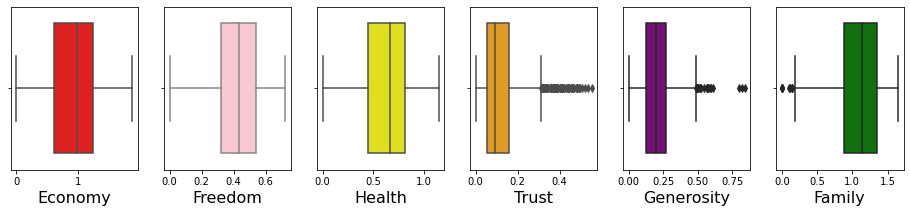

In [ ]:
fig = plt.figure(figsize = (16,3))



ax1 = fig.add_subplot(161)
sns.boxplot(df1.Economy, color = 'red')
plt.xlabel('Economy', fontsize = 16)

ax1 = fig.add_subplot(162)
sns.boxplot(df1.Freedom , color = 'pink')
plt.xlabel('Freedom', fontsize = 16)

ax1 = fig.add_subplot(163)
sns.boxplot(df1.Health ,color = 'yellow')
plt.xlabel('Health', fontsize = 16)

ax1 = fig.add_subplot(164)
sns.boxplot(df1.Trust ,color = 'orange')
plt.xlabel('Trust', fontsize = 16)

ax1 = fig.add_subplot(165)
sns.boxplot(df1.Generosity ,color = 'purple')
plt.xlabel('Generosity', fontsize = 16)

ax1 = fig.add_subplot(166)
sns.boxplot(df1.Family ,color = 'green')
plt.xlabel('Family', fontsize = 16)


plt.show();


**Checking of unique values (Basic EDA)**

In [ ]:
df1.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
df1.Year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

**Predictive Modelling**







Explolatory Data Analysis

**EDA with pairplot**

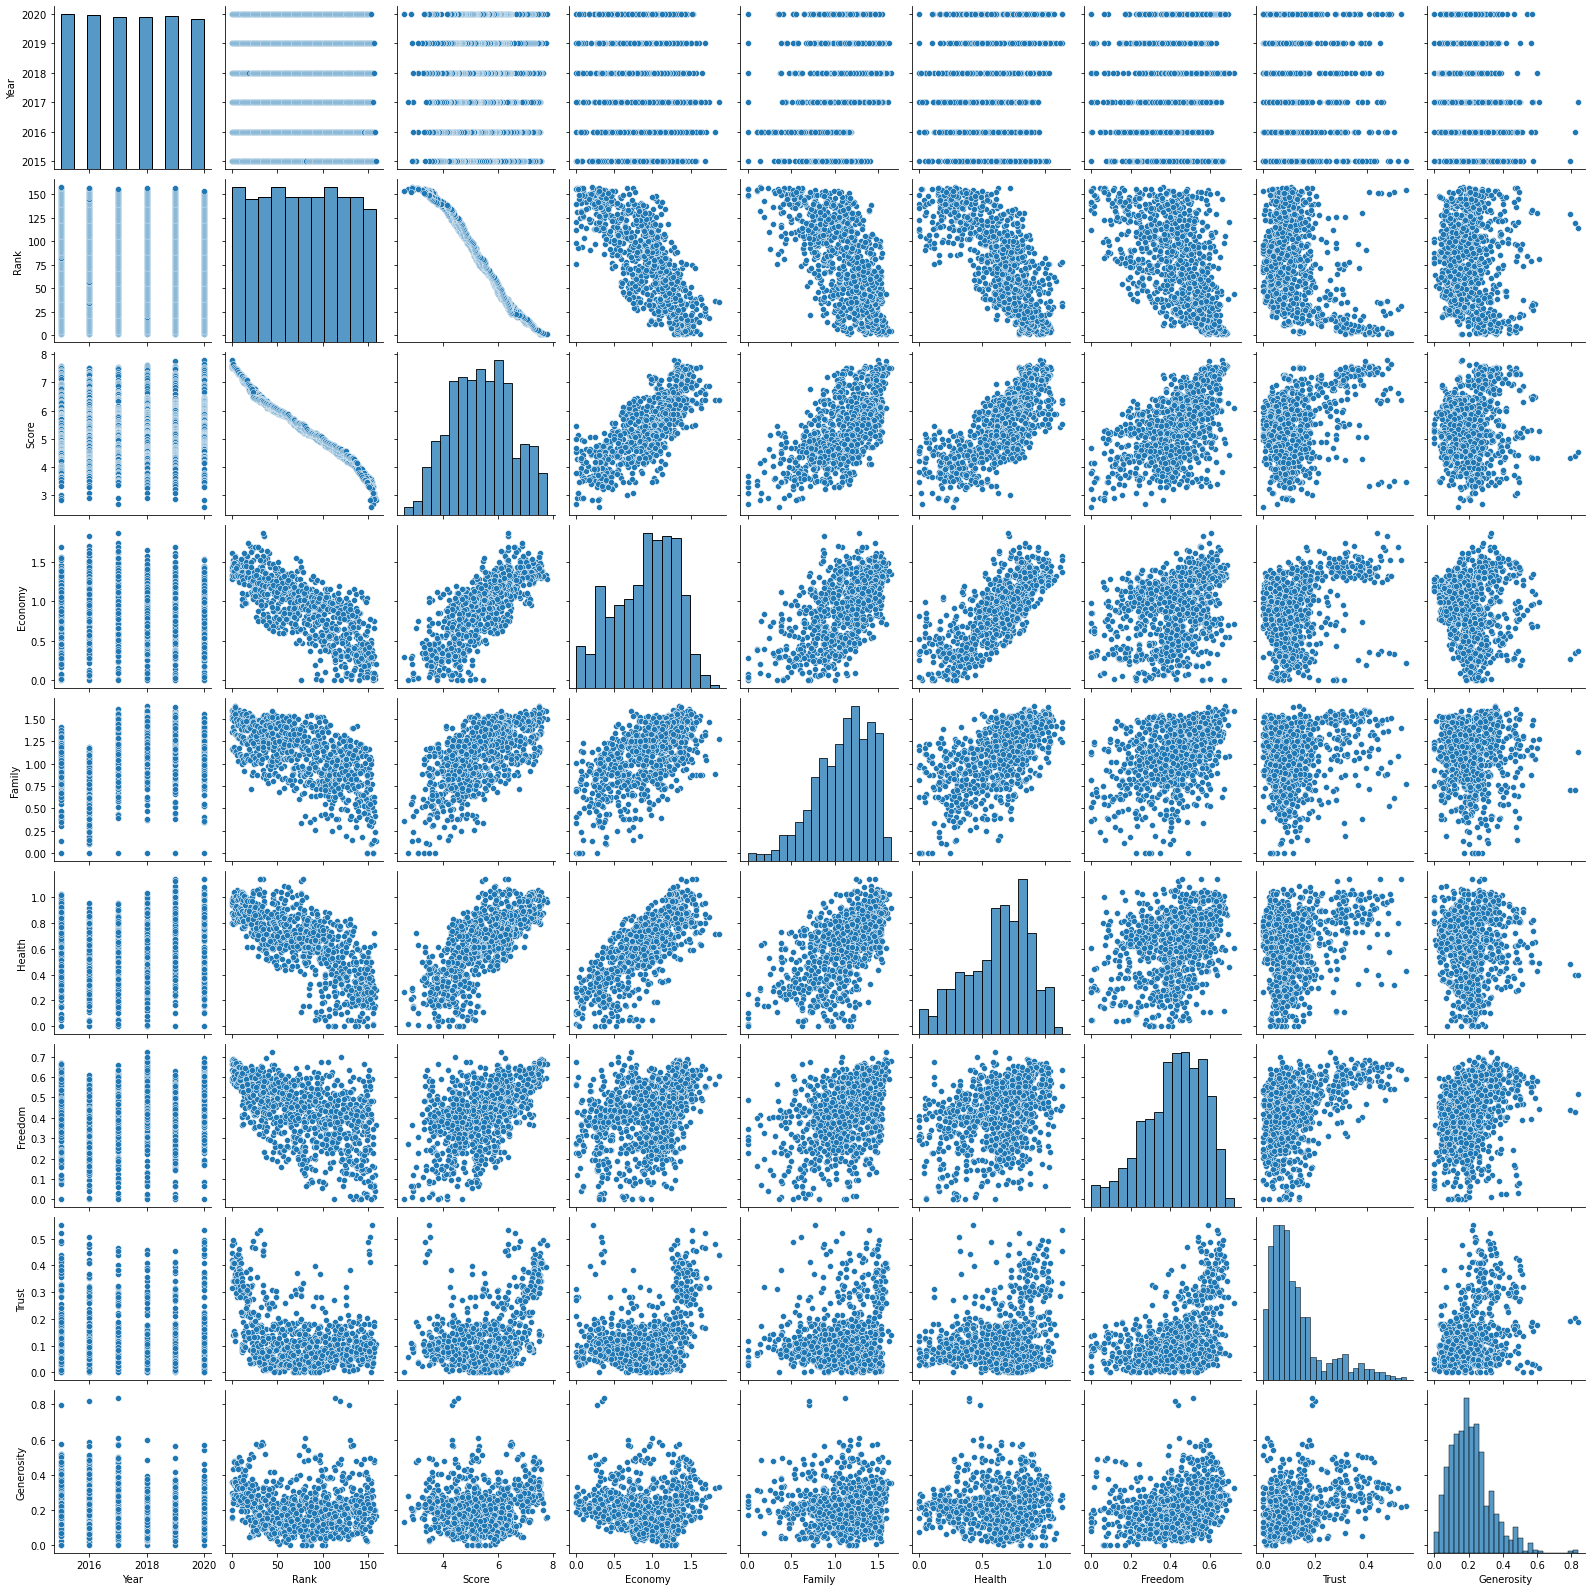

In [ ]:
# make a pairplot for selection of model.
sns.pairplot(df1)
plt.show()

Pairplot shows that **Trust and Geneority** both have **right skewnees**

**Our Response variable is continous in nature, so we can apply Linear Regression Model but for that all assumptions of Linear Regression must met.**

* 1) `Linearity`
* 2) `Residuals are normal`
* 3) `No Multicolinearity`
* 4) `Residuals show constant variance

`Visual inspection of all the Explanatory variables decide that linear model is appropriate,for application of  linear model , the histogram of each explanatory variable should look approximately normal`

`Linear Model Assumptions`

`FIRST ASSUMPTION`

check if the relationship between explanatory and response variable is linear using a **scatterplot.**

we can also verify this condition with a plot of the residuals vs. explantary variable for simple linear regression

SECOND ASSUMPTION

**Rersidual contant Variance
* **With multiple linear regression we  check the constant variance condition using a plot of  residuals vs. fitted.

* Histogram checks the population distribution of a quantitative variable,like its center, spread, modality 
* Create a scatter plot and visually decide if a linear model is appropriate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

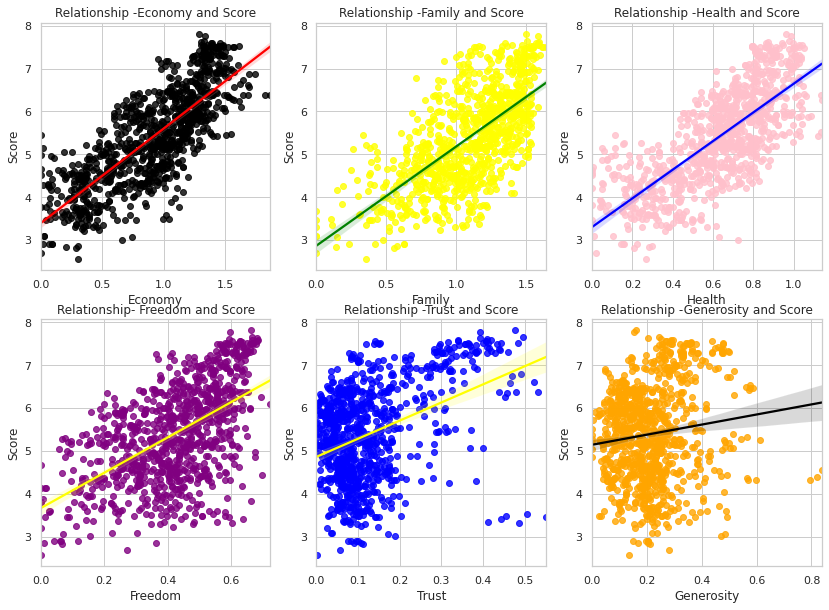

In [ ]:
import matplotlib.pyplot as plt 

sns.set(style = 'whitegrid')
fig = plt.figure(figsize = (14,10))                                  # create fig object

ax1 = fig.add_subplot(231)               # adds subplot to figure at the first position
sns.regplot(df1.Economy, df1.Score, scatter_kws={"color": "black"}, line_kws={"color": "red"}, fit_reg = True)    # add regression line
ax1.set(xlabel='Economy', ylabel='Score')
plt.title("Relationship -Economy and Score")



ax2 = fig.add_subplot(232)
sns.regplot(df1.Family, df1.Score,color ='yellow', line_kws={"color": "green"}, fit_reg = True)
ax2.set(xlabel='Family', ylabel='Score')
plt.title("Relationship -Family and Score")



ax3 = fig.add_subplot(233)
sns.regplot(df1.Health, df1.Score,color ='pink', line_kws={"color": "blue"}, fit_reg = True)
ax3.set(xlabel='Health', ylabel='Score')
plt.title("Relationship -Health and Score")



ax4 = fig.add_subplot(234)
sns.regplot(df1.Freedom, df1.Score, color ='purple',line_kws={"color": "yellow"}, fit_reg = True)
ax4.set(xlabel='Freedom', ylabel='Score')
plt.title("Relationship- Freedom and Score")


ax5 = fig.add_subplot(235)
sns.regplot(df1.Trust, df1.Score, color ='blue', line_kws={"color": "yellow"}, fit_reg = True)
ax5.set(xlabel='Trust', ylabel='Score')
plt.title("Relationship -Trust and Score")



ax6 = fig.add_subplot(236)
sns.regplot(df1.Generosity, df1.Score,color = 'orange', line_kws={"color": "black"},fit_reg = True)
ax6.set(xlabel='Generosity', ylabel='Score')
plt.title("Relationship -Generosity and Score")


plt.show()

Visual inspection of Scatter plots shows that `Ecocomy`, `Family`, `Health`, `Freedom has strong and positive association with target variable but  trust and Geneorisity do not show strong association for some value with target variable , So there need to check further`

`Remember , Association does not mean Causation, So further exploration of data is required`

**We can confirm our observation by calculating the correlation matrix**

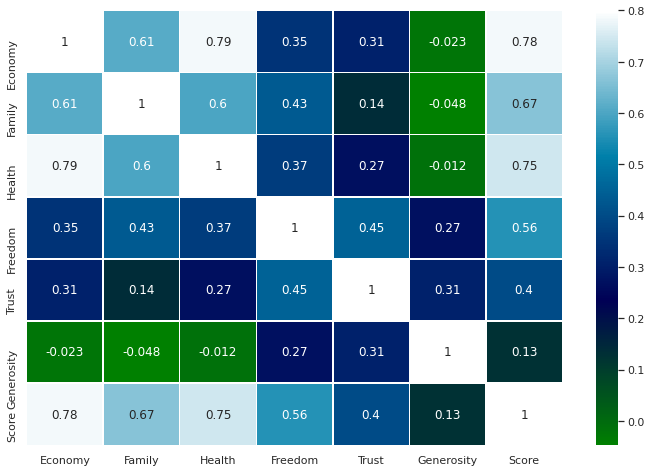

In [ ]:

corr = df1[['Economy','Family', 'Health','Freedom', 'Trust','Generosity', 'Score']].corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr, annot= True, cmap = 'ocean', linewidths=.5,vmax=.8)
plt.show()

 `Generosity` and `Perceptions of corruption` aren't that much correlated with the Response variable (`Score`)


`We want to Predict that Country' Economy(GDP per Capita) ,  Family and Freedom and health to make life choices leads to Country's Happiness`

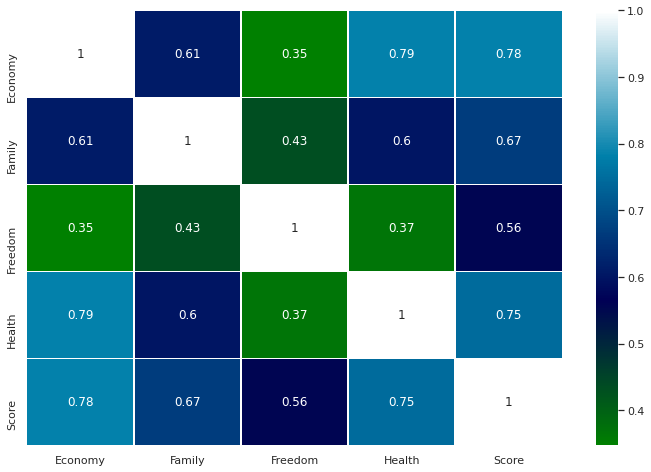

In [ ]:
correlation = df1[['Economy','Family','Freedom','Health', 'Score']].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot= True, cmap = 'ocean', linewidths=.5)
plt.show()

###  2nd Assumption:  Residuals are normal`

`We use residuals instead of the predictors on the y-axis so that we can still check for linearity without worrying about other possible violations like collinearity between the predictors.`


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


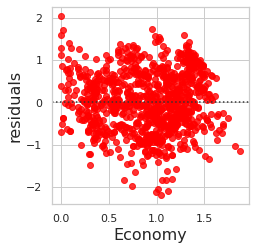

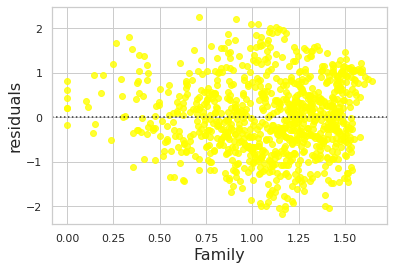

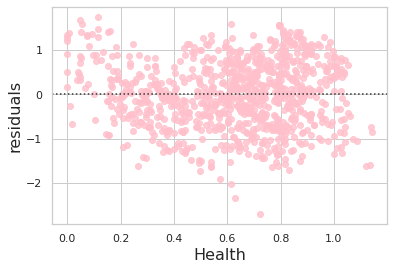

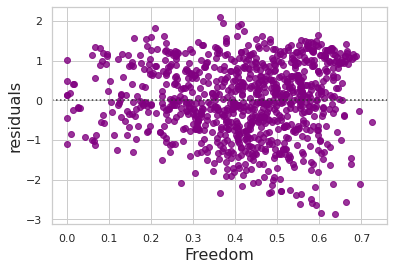

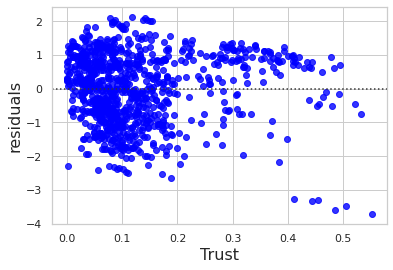

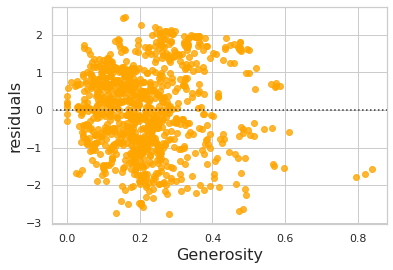

In [ ]:
sns.set(style = 'whitegrid')
fig = plt.figure(figsize = (12,8))



ax1 = fig.add_subplot(231)
sns.residplot('Economy', 'Score', data = df1,  color = 'red')
plt.xlabel('Economy', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();


ax2 = fig.add_subplot(232)
sns.residplot('Family', 'Score', data = df1,  color = 'yellow')
plt.xlabel('Family', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

ax3 = fig.add_subplot(233)
sns.residplot('Health', 'Score', data = df1,  color = 'pink')
plt.xlabel('Health', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

ax4 = fig.add_subplot(234)
sns.residplot('Freedom', 'Score', data = df1,  color = 'purple')
plt.xlabel('Freedom', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

ax5 = fig.add_subplot(235)
sns.residplot('Trust', 'Score', data = df1,  color = 'blue')
plt.xlabel('Trust', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

ax5 = fig.add_subplot(236)
sns.residplot('Generosity', 'Score', data = df1,  color = 'orange')
plt.xlabel('Generosity', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

`Check the  Distribution of each Explantory variable to see its distribution, since skewness in variable can degrade the performance of model  especially regression-based models.`

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

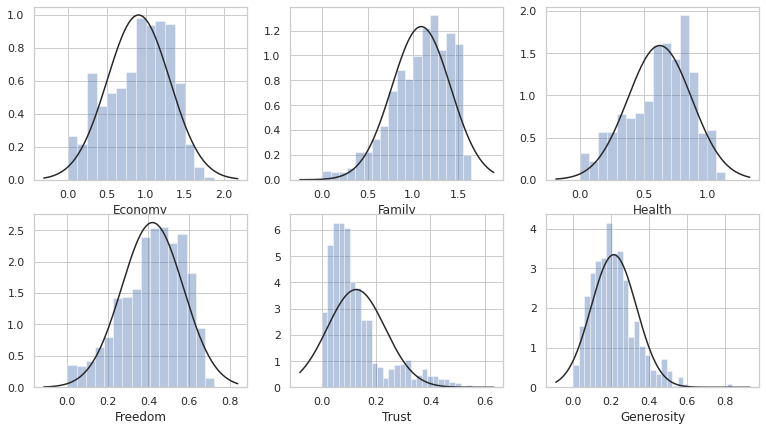

In [ ]:

sns.set(style = 'whitegrid')
fig = plt.figure(figsize = (13,7)) # create fig object
from scipy.stats import norm
# adds subplot to figure at the first position



ax7 = fig.add_subplot(231)
sns.distplot(df1.Economy, fit=norm, kde=False)
ax7.set(xlabel='Economy')


ax8 = fig.add_subplot(232)
sns.distplot(df1.Family, fit=norm, kde=False)
ax8.set(xlabel='Family')


ax9 = fig.add_subplot(233)
sns.distplot(df1.Health, fit=norm, kde=False)
ax9.set(xlabel='Health')


ax10 = fig.add_subplot(234)
sns.distplot(df1.Freedom, fit=norm, kde=False)
ax10.set(xlabel='Freedom')


ax11 = fig.add_subplot(235)
sns.distplot(df1.Trust, fit=norm, kde=False)
ax11.set(xlabel='Trust')


ax12 = fig.add_subplot(236)
sns.distplot(df1.Generosity, fit=norm, kde=False)
ax12.set(xlabel='Generosity')

plt.show()

 Check the **distribution of Target Variable**, our target variable is normally distributed **no need to perform any transformation**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


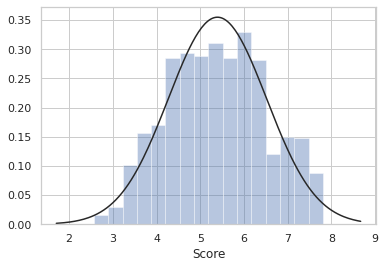

In [ ]:
sns.distplot(df1.Score, fit=norm, kde=False)
plt.show()

**Conclusion** `Trust and Geneority` do show skewnees in data it can `degrade the performance of the regression model` and it also violate one of the assumption of regression that there should be linarity , `residuals plots for these 2 variables` also show that points are not randomly scattered. So transformation is required.

* Trust and Geneorsity both are positively skewed.`

**Transformation for skewed data**

Data variables have to be linearly correlated, transformation may help to make the data relations linear.**transformation technique is Box-Cox could be applied for Trust and Geneorsity. both show positive skewness it can degrade the peformance of model.**

**Sqrt Transformation can be applied since data is right skewed and  has zero values so log tranformation is not possible.**

In [ ]:
df1['Trust_sqrt'] = np.sqrt(df1['Trust'])


Text(0.5, 1.0, 'Adjusted Trust vs. Original Trust')

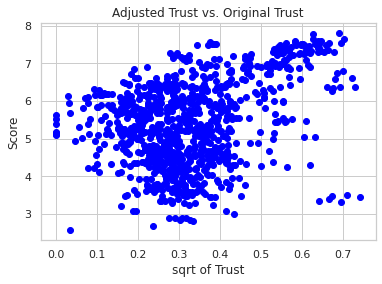

In [ ]:
# after transformation check linearity with reponse
plt.scatter(df1['Trust_sqrt'], df1['Score'], color = 'blue')

plt.xlabel("sqrt of Trust")
plt.ylabel("Score")
plt.title("Adjusted Trust vs. Original Trust")

**Conclusion after Transformation on Trust** Now Newly transformed column has better linear relationship with **Target Score for many of the values.**

###### Trust column now has normal Distribution

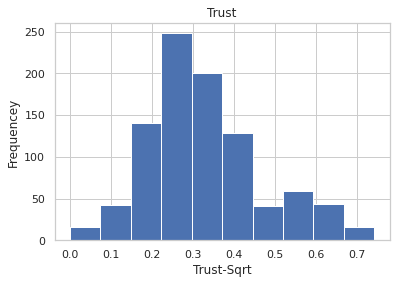

In [ ]:
# Histogram of sqrt of Trust column After Transformation
plt.hist(df1['Trust_sqrt'])
plt.title("Trust")
plt.xlabel("Trust-Sqrt")
plt.ylabel("Frequencey")
plt.show()

**Generosity Tranformation since data is skewed to the right side it can degrade the performance of model.**

In [ ]:
df1['Generosity_sqrt'] = np.sqrt(df1['Generosity'])

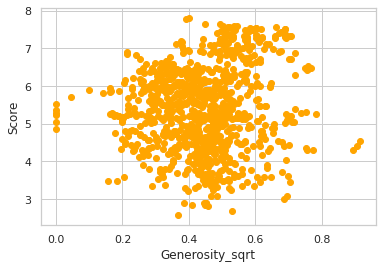

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df1['Generosity_sqrt'], df1['Score'], color = 'orange')
plt.xlabel('Generosity_sqrt')
plt.ylabel("Score")
plt.show()

**After Transformation  updated Geneorsity has Linear Relationship for many of the values with **Target Score**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


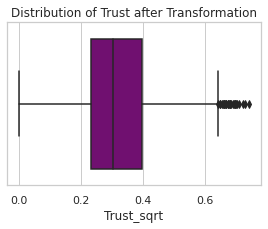

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


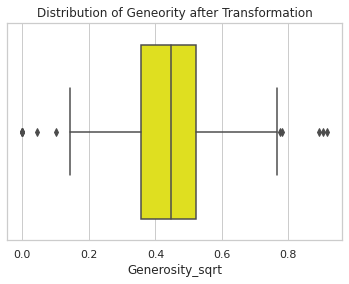

In [ ]:
# Distribution of Trust And Generosity after transformation for inspecting outliers.

fig = plt.figure(figsize = (10,3))


ax13 = fig.add_subplot(121)
ax13 = sns.boxplot(df1.Trust_sqrt, color ='purple')
ax13.set_title("Distribution of Trust after Transformation")
plt.show()


ax13 = fig.add_subplot(122)
ax14 = sns.boxplot(df1['Generosity_sqrt'], color = 'yellow')
ax14.set_title("Distribution of Geneority after Transformation")
plt.show()

**Check R-square (coefficient of determination without any transformation**

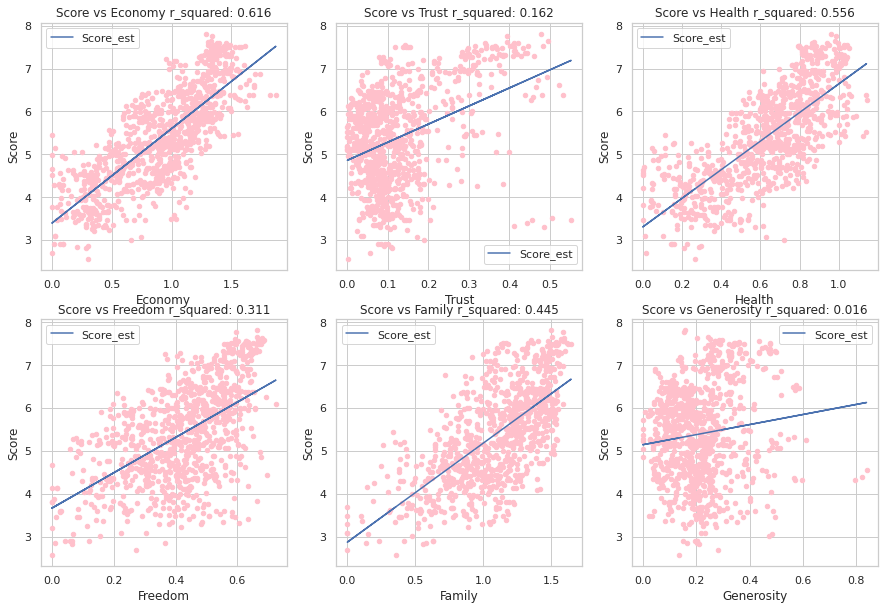

In [ ]:
columns = ['Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

m = []
for i in range(len(columns)-1):
    m.append(sm.ols('Score ~ '+columns[i+1], data=df1).fit())
    intercept , slope = m[-1].params
    df1['Score_est'] = intercept + (slope * df1[columns[i+1]])
    df1.plot.scatter(x=columns[i+1], y='Score', color='pink', ax=axes[i%2][i%3])
    df1.plot.line(x=columns[i+1], y='Score_est', ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title('Score vs ' + columns[i+1] + ' r_squared: ' + str(round(m[-1].rsquared,3)));

###  Checking for coorelation between our Features- Coorelation Matrix (after Transformation)

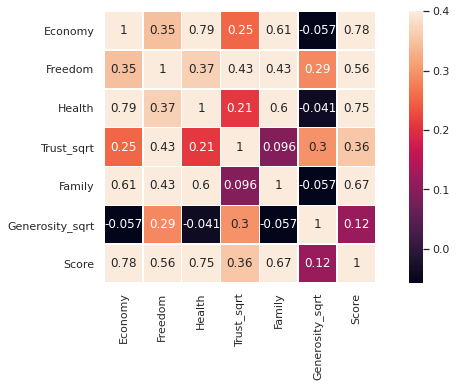

In [ ]:
plt.figure(figsize = (12, 5))


sns.heatmap(df1[['Economy','Freedom','Health','Trust_sqrt','Family', 'Generosity_sqrt','Score']].corr(),annot= True, linewidths=.5, vmax=.4, square=True)
plt.show()

**Conclusion from Heatmap** Generoristy  and trust correlation has increased but that increase does not show significant correlaion with happiness score. 

**Feature Importance**` which feature is actually responsible for predicting the target variable.`

**`rank`** has `negative correlation between the other attributes because the most happy country's ranking is 1. The smaller number the ranking is, the happier the people in that country.`
**Trust** and  **Geneorsity** has less correlation with Score

`Rank Feature is strongly negatively correlated with our Target Feature, It should be dropped. keeping both rank and Score  does not make sense.` Also we observe 
* Freedom, Heath, Family and Economy shows more correlation with our target variable Score.

**Feature Selection**

`Year , Region , Country and Rank` all are not required for building a model since year , region and country can not contribute to happiness so better to remove them.

`Null Hypothesis:` Economy, Family , Health, Freedom does not lead to Happniess

`Alternate Hypothesis:` Economy, Family, Health, Freedom does Lead to Happniess

####  Linear Regression with Happiness dataset

𝑌  = Happiness Score

and

𝑋 = all the other features (or independent variables, predictors)

which will be use to fit a linear regression model and predict Score. Will use the **least-squares method** to estimate the coefficients.

**3rd Condition** `**Mullticollinearity**`

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
# the independent variables set 
X = df1[['Economy', 'Family', 'Health','Trust', 'Generosity','Freedom']] 
y = df1['Score']
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["Predictors"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

   Predictors        VIF
0     Economy  18.084174
1      Family  18.578173
2      Health  20.016245
3       Trust   3.403368
4  Generosity   4.218613
5     Freedom  13.283738


`When we care more about how much each individual feature rather than a group of features affects the response variable Score, then removing multicollinearity may be a good option.
In our analysis we care about how group of features affect the target variable Score so there is no need to fix this`


**Fit the Linear Regression (Preditive Modelling Technique)**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
m = ols('Score ~ Economy + Family + Freedom + Health',df1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     693.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          3.33e-277
Time:                        00:28:55   Log-Likelihood:                -788.56
No. Observations:                 934   AIC:                             1587.
Df Residuals:                     929   BIC:                             1611.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2754      0.071     32.235      0.0

**Interpetation of p-value**, p-value for each of the  predictor Economy, Family, Freedom and health is less than significance level (0.5) so we can say that they are predictors for our  repsonse variable.

Lets look at our **4 most significant regression coefficients:**

The Largest regression coefficient is for **Freedom** of 1.9173 means that on average, every 1 unit increase in Freedom (to make choices) is associated with an average increase of 1.158 in Happiness score . Means if any country ' people will get freedom to make choices then they will be more happy.

Another significant feature, indicated by a high regression coefficient, is **Economy** of 1.1833. This means that on average, each point increase in Economy is associated with an increasee of 1.11 in happniess. country'good Economy or GDP per capita leads to Happiness.

Our third most significant feature, is **Health** of .9901. This means that on average, each unit increase in Healthy life expentancy is associated with an increase of happiness score

Our fourth most significant feature Family is indicated by high regression coefficient.**Family of 0.5687

**Intrepretting R-squared**

This coefficient of determination or r-squared, tells us that 75% percentage of the total variance in the Score can be explained by the linear regression model. This is an important statistics that measures how 'good' our model is at predicitng Score.

#### Evaluate the full Model -

Residual Plot

Text(0.5, 1.0, 'Predictions vs. Original Scores')

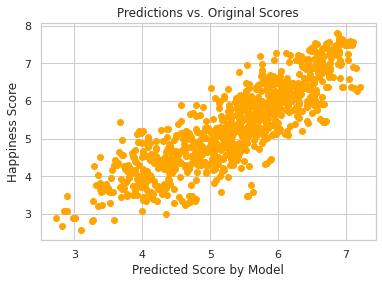

In [ ]:
predicted_scores = m.fittedvalues

plt.scatter(predicted_scores, df1.Score, color ='orange')

plt.xlabel("Predicted Score by Model")
plt.ylabel("Happiness Score")
plt.title("Predictions vs. Original Scores")

**Conclusion** 

We create a scatterplot between the predicted Scores, available in m.fittedvalues (where m is the fitted model) and the original Scores. We evaluate this plot to see how well our regression model predicts score of given the data in our data set.

A perfect model would get us a scatterplot where all the data lies on the 45 degree line. That would mean that x = y, and every predicted Score would have equalled the actual score.

**Conclusion of Pattern** The data does not show any pattern between fitted values and residuals , no assumptions have been voilated.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
X = df1[['Economy', 'Family','Freedom','Health']]

In [ ]:
y = df1['Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
results = lm.fit(X_train,y_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [1.19314791 0.53402193 1.86499645 0.93269628]


In [ ]:
coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Predictors', 'Coefficients'])
coefficient_df

,Predictors,Coefficients
0,Economy,1.193148
1,Family,0.534022
2,Freedom,1.864996
3,Health,0.932696


**GDP is the most important factor that contributes to the happniess of any Country.**

In [ ]:
# make predictions on the test data

predictions = lm.predict(X_test)

# compare actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
actual_vs_pred

,Actual,Predicted
4,7.413,6.463233
140,3.866,3.781358
8,7.284,6.848899
152,3.231,4.642114
109,4.696,4.854667
...,...,...
99,4.933,5.758682
137,4.107,4.814224
31,6.300,5.800197
89,5.073,5.461286


Text(0, 0.5, 'Predictions')

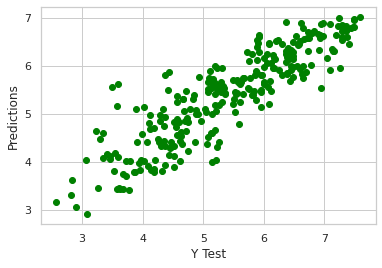

In [ ]:
plt.scatter(y_test,predictions, color ='green')
plt.xlabel('Y Test')
plt.ylabel('Predictions')

## Evaluating the model

In [ ]:
from sklearn import metrics

In [ ]:
print('MSE: ',metrics.mean_squared_error(y_test,predictions))

MSE:  0.3005817853331863


In [ ]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  0.5482533951861915


RMSE  is low, lower it is the better it is.

##  Forward Selection

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Separating independent and dependent variability
y = df1['Score']
X = df1[['Economy', 'Health','Freedom','Family']]

**Split the data in to Training and Testing part**

In [ ]:
# Split the datase in to testing and training part.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Create and Train the model Using Linear Regression**

### Forward Stepwise Regression**

In [ ]:
lm_economy = LinearRegression()  # Creation of Model
lm_economy.fit(X_train[['Economy']],y_train)   # Train the model with Single Predictor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions_e = lm_economy.predict(X_test[['Economy']])   # make predictions

In [ ]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions_e))) # check RMSE value with Single predictor Economy

RMSE:  0.7190726544313508


In [ ]:
#Calculate r-2 adjusted with single predictor
m_e_r  = ols('Score ~ Economy',df1).fit()
print(m_e_r.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1495.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          6.44e-196
Time:                        00:29:20   Log-Likelihood:                -987.49
No. Observations:                 934   AIC:                             1979.
Df Residuals:                     932   BIC:                             1989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3931      0.057     60.027      0.0

**Conclusion** Adjusted r-square is 0.616 with single predictor Economy

In [ ]:
# Model with 2 predictors
lm_ef = LinearRegression()
lm_ef.fit(X_train[['Economy', 'Freedom']], y_train) # add one more predictor 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions_ef = lm_ef.predict(X_test[['Economy','Freedom']]) # predictions with 2 predictors

In [ ]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions_ef))) # calculate RMSE with 2 features.

RMSE:  0.6034726635752199


**Conclusion** `The value of RMSE is reduced when new predictor is added, from 0.7190 to 0.6034`

In [ ]:
m_ef  = ols('Score ~ Economy + Freedom',df1).fit() # cacluate r-square adjusted with 2 predictors
print(m_ef.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1132.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          5.11e-250
Time:                        00:29:25   Log-Likelihood:                -858.63
No. Observations:                 934   AIC:                             1723.
Df Residuals:                     931   BIC:                             1738.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6738      0.065     41.376      0.0

**Conclusion** R-square adjusted increases with addition of Freedom predictor ---> 0.708

In [ ]:
# train model with 3 predictors
lm_efh = LinearRegression()
lm_efh.fit(X_train[['Economy', 'Freedom', 'Health']], y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions_efh = lm_efh.predict(X_test[['Economy', 'Freedom', 'Health']]) # make predictions with 3 models.

In [ ]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions_efh))) # check RMSE with 3 features.

RMSE:  0.5694257019498947


**Conclusion**, RMSE value decreases further when we add Health predictor in the model.

In [ ]:
m_efh = ols('Score ~ Economy+ Freedom+Health',df1).fit()
print(m_efh.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     857.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.84e-267
Time:                        00:29:29   Log-Likelihood:                -815.05
No. Observations:                 934   AIC:                             1638.
Df Residuals:                     930   BIC:                             1657.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5253      0.064     39.676      0.0

**Conclusion** Adusted r-square increase with addition of Freedom predictor ---> 0.734 

In [ ]:
# train model  4 with predictors
lm_efhf = LinearRegression()
lm_efhf.fit(X_train[['Economy', 'Freedom', 'Health','Family']], y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions_efh))) 

RMSE:  0.5694257019498947


In [ ]:
m_efhf = ols('Score ~ Economy+ Freedom + Health + Family',df1).fit()
print(m_efhf.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     693.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          3.33e-277
Time:                        00:29:33   Log-Likelihood:                -788.56
No. Observations:                 934   AIC:                             1587.
Df Residuals:                     929   BIC:                             1611.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2754      0.071     32.235      0.0

**Conclusion** adjusted r-square has increased with addion of Family predictors.

**Conclusion** RMSE  has been reduced with family predictor 

**Conclusion** adjusted r-square value is increased with addition of our 4 predictors so we can say that all our 4 selected predictors are able to explain the response variable 

###  Evaluating the fit of model with Single Strong predictor Economy.**

We will take a reduced model using only our strongest predictor, # Economy, to predict Score. We will evaluate this model using:

* Q-Q plot
* predicted Score by model vs Actual Score

In [ ]:
m_e = ols('Score ~ Economy',df1).fit()
print(m_e.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1495.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          6.44e-196
Time:                        00:29:39   Log-Likelihood:                -987.49
No. Observations:                 934   AIC:                             1979.
Df Residuals:                     932   BIC:                             1989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3931      0.057     60.027      0.0

**Check the Pattern**  

`There should not be any pattern between the fitted value and residuals`, then we can say that linear regression assumption has been met.

Text(0.5, 1.0, 'Fitted Values vs. Residuals with Economy')

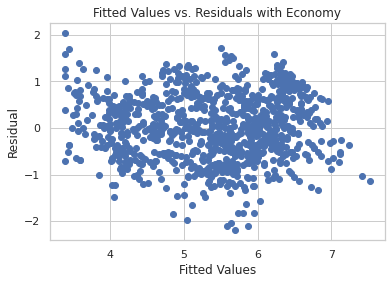

In [ ]:
x = m_e.fittedvalues
y = m_e.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals with Economy")

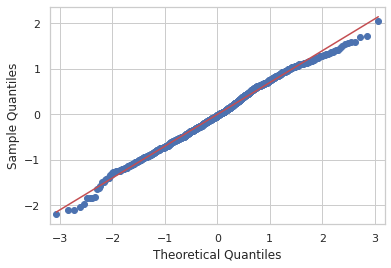

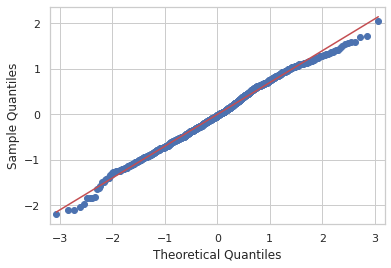

In [ ]:
# resid-----> contains model residuals
# m object that contain multiple regression results
sm.qqplot(m_e.resid, line ='r')